In [6]:
%matplotlib inline

## Week 4 

__Topics__
* Progation of error in calculations
* Periodic functions review
* Linear algebra review
* General least squares fitting
* Getting started with Git & version control

## Error propagation ##

### How error propagates through calculations and anlysis

Imagine you have three variables: <br>
a, b, c <br>
Each of those variables has a measure of uncertainty: <br>
$\sigma_a,\sigma_b,\sigma_c$

Some calculated variable $ y = f(a,b,c) $ <br>

__What is the uncertainty of y? __

#### $$ \sigma_y ^2 \approx \sigma_a ^2 \left(\frac{\partial y}{\partial a}\right) +\sigma_b ^2 \left(\frac{\partial y}{\partial b}\right) + \sigma_c ^2 \left(\frac{\partial y}{\partial c}\right) + 2\sigma_{ab} ^2 \left(\frac{\partial y}{\partial a}\right)\left(\frac{\partial y}{\partial b}\right) + 2\sigma_{bc} ^2 \left(\frac{\partial y}{\partial b}\right)\left(\frac{\partial y}{\partial c}\right) + 2\sigma_{ac} ^2 \left(\frac{\partial y}{\partial a}\right)\left(\frac{\partial y}{\partial c}\right) $$ ####

This equation shows that the uncertainty in the calculated variable $y$ depends on:
* The uncertainty in the measurement variables ($\sigma_a,\sigma_b,\sigma_c$)
* The covariance among measurment variables ($\sigma_{ab}^2,\sigma_{bc}^2,\sigma_{ac}^2$)
* The relationship between magnitudes of the measurement variables and calculated variable ($\partial y$/$\partial a$, $\partial y$/$\partial b$, $\partial y$/$\partial c$)

### Special cases<br>

Rules for error propagation in common operations can be derived from the equation above. If there all measurement variables are independent, then the terms involving covariance become zero. The examples listed below assume no correlation between measurement variables.

A more complete table, including covariance terms, can be found on Wikipedia:
https://en.wikipedia.org/wiki/Propagation_of_uncertainty#Example_formulas


#### Addition, subtractions 

$ y = a + b - c $

_error:_

$\sigma_y ^2  = \sigma_a ^2 + \sigma_b ^2 + \sigma_c ^2 $

#### Multiplication, division

$ y = \frac{ab}{c} $

_relative error:_

$ (\frac{\sigma_y }{y})^2 =(\frac{\sigma_a }{a})^2 + (\frac{\sigma_b }{b})^2 + (\frac{\sigma_c }{c})^2  $

#### Multiplying by an exact number

$ y=ma $

_error:_

$(\sigma_y) = m(\sigma_a) $

_relative error:_

$(\frac{\sigma_y}{y})^2 = (\frac{\sigma_a}{a})^2 $

#### Power

$y = a^m$

$ (\frac{\sigma_y}{y}) = m (\frac{\sigma_a}{a}) $

#### Natural log 

$ y= \ln{a} $

$\sigma_y = \frac{\sigma_a}{a} $

#### Log, base 10

$ y = \log_{10}{a} $

$\sigma_y = 0.434 \frac{\sigma_a}{a} $

#### Exponential

$ y = e^a $

$\sigma_y = y \sigma_a$

#### Exponential, base 10

$ y = 10^a $ 

$\sigma_y = 2.303 y \sigma_a$

__Example__: Measure diameter of a sphere:

relative error = 5%

Error in calculating volume?

$V = \frac{4}{3} \pi r^3 $

This problem can be approached by breaking it into several parts. First, we have the relative error in measuring the diameter, what is the error in calculating the radius, 

$r = \frac{1}{2}d$?

The _absolute error_ changes when calculating the radius,

$$ \sigma_r = \frac{1}{2} \sigma_d, $$

but the _relative error_ does not,

$$ \frac{\sigma_r}{r} = \frac{\sigma_d}{d}. $$

Similarly, the relative error of the volume, $V$, is equal to the relative error in calculating $r^3$,

$$ \frac{\sigma_V}{V} = \frac{\sigma_{r^3}}{r^3}. $$

The error in $r^3$ can be found by using the rule for powers,

$$ \left(\frac{\sigma_{r^3}}{r^3}\right) = 3 \left(\frac{\sigma_r}{r}\right), $$

which is equivalent to 

$$ \left(\frac{\sigma_{V}}{V}\right) = 3 \left(\frac{\sigma_d}{d}\right) $$

$$ \left(\frac{\sigma_{V}}{V}\right) = 3 \left(0.05\right) = 0.15 $$


__Example__: Marine Carbonate Chemistry

<img src='images\carbonate_example.png',width=500>

[source](http://acmg.seas.harvard.edu/people/faculty/djj/book/bookchap6.html)

> Relative concentrations of dissolved CO2 and carbonate ions in seawater are determined by pH pf seawater and dissociation constants $K_1'$ and $K_2'$

DIC = dissolved inorganic carbon

DIC = [CO2] + [HCO3-] + [CO3-2]


$ CO_2 + H_2 O \iff HCO_{3}^- + H^+ $

$k_1'= \frac{[HCO3-][H^+]} {[CO_2]}$

$ HCO_3 ^- \iff CO_3 ^2- +H^+ $

$k_2' =\frac{ [CO3- ^2-][H^+]}{[HCO_3 ^-] }$


partial pressure of CO2

$pCO2 = \frac{[CO2]}{K_{h,CO_2}}$
Henry's law constant = 3.24X10^-2 \frac{mol}{kg atm} at 20 degrees c, s=35 PSU

$pK_1' = 5.847$

$pK_2' = 8.966$

$pH = -\log_{10}{[H^+]} \to [H^+] = 10^{-pH}$

$pK_1' = -\log_{10}{K_1'} \to K_1' = 10^{-pK}$

We can measure pCO_2 and pH well, but not DIC, but not alkalinity

$[CO_2] = \frac{DIC} {1 + \frac{k_1'}{H^+} + \frac{k_1' k_2'}{[H^+]^2}}$


Analytical error in pH = 0.0020<br>
Analytical error in DIC = umol kg-1

What is the $\sigma_{H^+}$?

$\sigma_{H^+} = 2.303[H^+]\sigma_{pH}$

To get the order of magnitude assume a pH around 8.2 (typical for seawater)

$[H^+] \approx 10^{-8.2}$


What is the error in calculating the partial pressure of CO2 in seawater from these measurements?

## Least squares solutions: fitting linear equations to data

#### Goal: Fitting an annual cycle:

<img src='images\annual_sst.png',width=700>


source: Emery and Thompson

#### Periodic function review

Fundamental periodic functions:
Sine and Cosine
<img src='images\periodic_fxn.png',width=500>


Vertical and Horizontal offsets:
<img src='images\per_phase_shift.png',width=500>

[source](https://www.mathsisfun.com/algebra/amplitude-period-frequency-phase-shift.html)


$y = A \sin(Bx + C) + D$

A = amplitude
period =$ \frac{2\pi}{b} $
phase shift = $\frac{-C}{B}$
vertical shift = D

##### Exercises:
Write an equation for a wave:
* 2 meter amplitude
* 10 second period

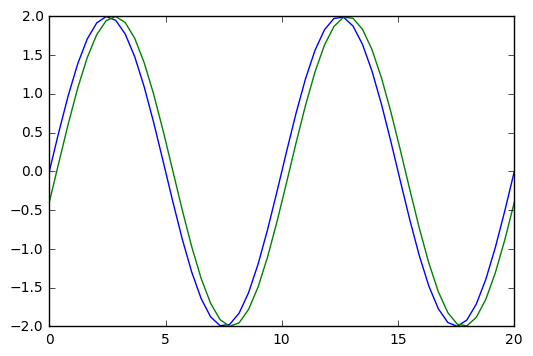

In [7]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
fig, ax = plt.subplots()
t = np.linspace(0,20)
y_1 = 2 * np.sin((2 * np.pi * t)/(10))
y_2 = 2 * np.sin((2 * np.pi * t)/(10) - (2/10))
ax.plot(t,y_1)
ax.plot(t,y_2)

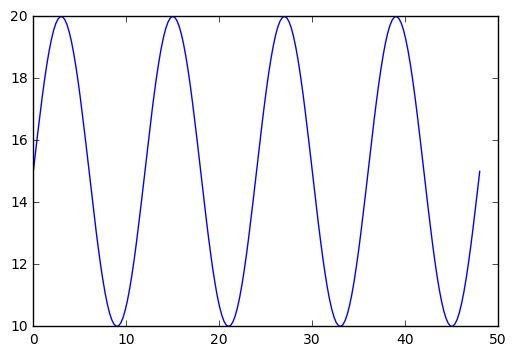

In [8]:
fig, ax = plt.subplots()
mean_t = 10
amp_t = 5

plt.figure()
t = np.linspace(0,12*4,num=200)
y_1 =  5*np.sin((2 * np.pi * t)/(12)) + 15
ax.plot(t,y_1)

$T = A  sin(\frac{2 \pi t }{12 months} + \phi) + c$




#### Harmonic Analysis

<img src='images/harmonic_analysis.png' width=500>

From Strub et al. (1987) Seasonal cycles of currents, temperature and winds over the Northeast Pacific continental shelf

<img src='images/harmonic_analysis_2.png' width=700>

* Can use to remove seasonal cycle when studying interannual variability

* Often annual and semi annual harmonic as used to fit seasonal cycle

* Coefficients and phase lags can summarize difference between locations

#### Linear algebra review: 3 equations, 3 unknowns

[Solving a system of equations](https://www.mathsisfun.com/algebra/systems-linear-equations-matrices.html)

In [16]:
y = np.array([6,-4,27])
A = np.array([[1,1,1],
              [0,2,5],
              [2,5,-1]])
print(A)

[[ 1  1  1]
 [ 0  2  5]
 [ 2  5 -1]]


In [17]:
np.linalg.solve(A,y)

array([ 5.,  3., -2.])

In [18]:
inv_A = np.linalg.inv(A)
print('Inverse Methods:', np.dot(inv_A,y))

Inverse Methods: [ 5.  3. -2.]


#### Harmonic analysis: seasonal SST

##### Exercise

Use the least squares function to solve an overdetermined system of equations (more equations than unknowns).

In [20]:
sst = np.array([7.6,7.4,8.2,9.2,10.2,11.5,12.4,13.4,13.7,11.8,10.1,9.0,8.9,9.5,10.6,11.4,12.9,12.7,13.9,14.2,13.5,11.4,10.9,8.1])
t = np.arange(1,25,1)

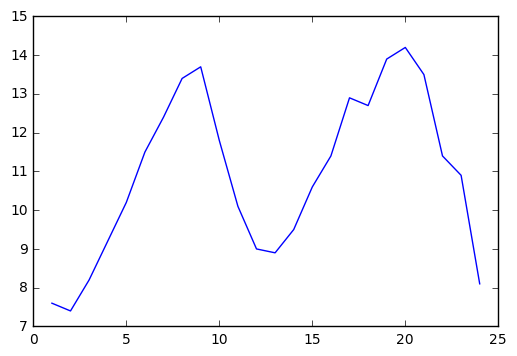

In [19]:
fig, ax = plt.subplots()
ax.plot(t,sst)

__ Basic Git Steps __

* Create files
* Put in 'Staging area'
* Create milestones from file in staging area

See [Software Carpentry git tutorial](https://swcarpentry.github.io/git-novice/)

